In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
#Loading the dataset
mimic = pd.read_csv('MIMIC III.csv')

In [3]:
#Understanding the variables and it's types
mimic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295059 entries, 0 to 2295058
Data columns (total 14 columns):
HADM_ID               int64
SUBJECT_ID            int64
AdmitTime             object
DischTime             object
admission_type        object
admission_location    object
insurance             object
marital_status        object
gender                object
los                   float64
procedures_icd        int64
procedures_seq        int64
diagnoses_icd         object
diagnoses_seq         int64
dtypes: float64(1), int64(5), object(8)
memory usage: 245.1+ MB


In [4]:
#To better identify difference between ICU lOS and Total Hospital LOS
mimic = mimic.rename(columns = {"los":"ICU LOS"})

In [5]:
# As we can see the variable type is not correct for AdmitTime and DischargeTime
mimic['AdmitTime'] = pd.to_datetime(mimic['AdmitTime'])
mimic['DischTime'] = pd.to_datetime(mimic['DischTime'])
#Here we corrected the formats for those two columns

In [6]:
#Information about dataset after correction
mimic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295059 entries, 0 to 2295058
Data columns (total 14 columns):
HADM_ID               int64
SUBJECT_ID            int64
AdmitTime             datetime64[ns]
DischTime             datetime64[ns]
admission_type        object
admission_location    object
insurance             object
marital_status        object
gender                object
ICU LOS               float64
procedures_icd        int64
procedures_seq        int64
diagnoses_icd         object
diagnoses_seq         int64
dtypes: datetime64[ns](2), float64(1), int64(5), object(6)
memory usage: 245.1+ MB


In [7]:
#Calculating the length of stay in days from the Discharge time and Admit time
mimic['HospitalLengthOfStay']= mimic['DischTime'] - mimic['AdmitTime']

In [8]:
#Min max values in the newly calculated Length of stay values. 
print("Min LOS",mimic['HospitalLengthOfStay'].min(),"\nMax LOS",mimic['HospitalLengthOfStay'].max())

Min LOS 0 days 00:00:00 
Max LOS 295 days 00:00:00


In [9]:
#The calculated Hospital Length of stay column is a time series format and we have to convert it to a integer format. 
mimic['HospitalLengthOfStay'] = mimic['HospitalLengthOfStay'].dt.days

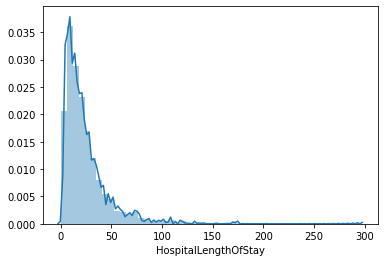

In [10]:
#Plotting the distribution of Hospital Length of Stay
import seaborn as sn
import matplotlib as plt
sn.distplot(mimic['HospitalLengthOfStay'])

In [11]:
#From the graph we can see that the graph is skewed to the right and creating models on highly skewed data may reduces the accuracy. 
#Counting number of rows where the Length of stay is less than 40
mimic[mimic.HospitalLengthOfStay < 40].count()
#As we can see there's enough data to make a accurate model considering lENGTH OF STAY less than 40 days. 

HADM_ID                 1942478
SUBJECT_ID              1942478
AdmitTime               1942478
DischTime               1942478
admission_type          1942478
admission_location      1942478
insurance               1942478
marital_status          1789895
gender                  1942478
ICU LOS                 1942375
procedures_icd          1942478
procedures_seq          1942478
diagnoses_icd           1942478
diagnoses_seq           1942478
HospitalLengthOfStay    1942478
dtype: int64

In [12]:
#Creating other dataframe where LOS is below 40 days. 
mimic_40 = mimic[mimic.HospitalLengthOfStay < 40]

In [15]:
len(mimic_40['SUBJECT_ID'].unique().tolist())

27750

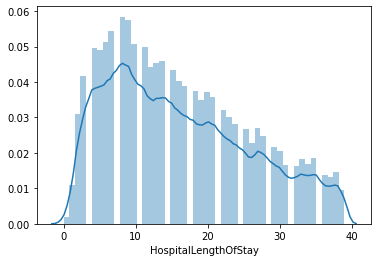

In [13]:
#Dristribution graph for our sample dataset. 
sn.distplot(mimic_40['HospitalLengthOfStay'])

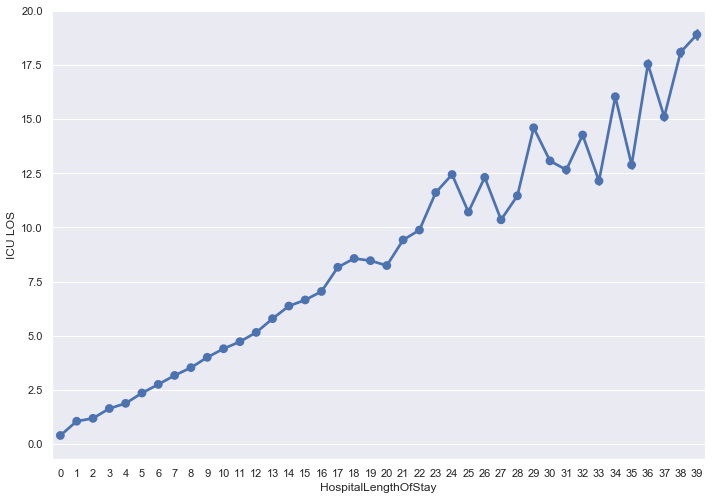

In [14]:
# Liniarity graph between the Hospital LOS and ICU LOS.
sn.set(rc={'figure.figsize':(11.7,8.27)})
sn.pointplot(x = mimic_40['HospitalLengthOfStay'], y = mimic_40['ICU LOS'])

In [15]:
# Unique values in each column 
print("Unique values in admission_type:- ",mimic_40.admission_type.unique())
print("\nUnique values in admission_location:- ",mimic_40.admission_location.unique())
print("\nUnique values in insurance:- ",mimic_40.insurance.unique())
print("\nUnique values in marital_status:- ",mimic_40.marital_status.unique())
print("\nUnique values in gender:- ",mimic_40.gender.unique())
print("\nUnique values in diagnoses_icd:- ",mimic_40.diagnoses_icd.unique())

Unique values in admission_type:-  ['EMERGENCY' 'NEWBORN' 'ELECTIVE' 'URGENT']

Unique values in admission_location:-  ['EMERGENCY ROOM ADMIT' 'CLINIC REFERRAL/PREMATURE'
 'TRANSFER FROM HOSP/EXTRAM' 'PHYS REFERRAL/NORMAL DELI'
 'HMO REFERRAL/SICK' '** INFO NOT AVAILABLE **'
 'TRANSFER FROM SKILLED NUR' 'TRANSFER FROM OTHER HEALT'
 'TRSF WITHIN THIS FACILITY']

Unique values in insurance:-  ['Medicare' 'Private' 'Medicaid' 'Government' 'Self Pay']

Unique values in marital_status:-  ['MARRIED' nan 'DIVORCED' 'SINGLE' 'WIDOWED' 'UNKNOWN (DEFAULT)'
 'SEPARATED' 'LIFE PARTNER']

Unique values in gender:-  ['M' 'F']

Unique values in diagnoses_icd:-  ['00845' '5780' '5990' ... '6963' '80710' 'V331']


In [16]:
#Admission type columns looks good in terms of catagories. 
#Admission Location column we need to improve in terms of catagories, which are not clearly understandable. 
#Insurance column also needs some cleanup
#Mrital column has some catagories which seems repetitive and also has some null values. 
#Gender column in perfect and do not have null values
#Diagnoses_icd has some neumeric values and some are text and neumeric so we need to fix that. 

In [17]:
#Checking how many icd9 codes are not completely neumeric (icd 9 codes are integer values unlike icd 10)
a = 0
for i in mimic_40.diagnoses_icd:
    if(i.isdigit() != True):
        a = a+1
        
print(a)

248012


In [18]:
#Extracting neumeric values from the diagnoses_icd and remove the characters. The output will be  a neumeric string. 
num = []
X = ''
a = 0
import re
for i in mimic_40.diagnoses_icd:
    num.append(re.sub('[^0-9]','', i))

mimic_40['diagnoses_icd'] = num

C:\Users\soham\Anaconda3\envs\tn1\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [19]:
# Now we will convert string of diagnoses icd codes to just numbers. 
mimic_40['diagnoses_icd'] = pd.to_numeric(mimic_40['diagnoses_icd'])

C:\Users\soham\Anaconda3\envs\tn1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
# The null values in marital status says that we may not know the status, which means it is unknown to us. 
mimic_40['marital_status'].fillna('UNKNOWN', inplace=True)
# Here we replaced the null values to Unknown. 
mimic_40['marital_status'] = mimic_40['marital_status'].replace({'UNKNOWN (DEFAULT)':'UNKNOWN'})
# Further theres a Unknown (Deafult) catagory which we can combine with just Unknown, and that is what we did here.

C:\Users\soham\Anaconda3\envs\tn1\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\soham\Anaconda3\envs\tn1\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [21]:
#Now we will check unique values in the marital_status after correcting maritial status column
print("\nUnique values in marital_status:- ",mimic_40.marital_status.unique())


Unique values in marital_status:-  ['MARRIED' 'UNKNOWN' 'DIVORCED' 'SINGLE' 'WIDOWED' 'SEPARATED'
 'LIFE PARTNER']


In [22]:
#Counting unique values in insurance column
mimic_40['insurance'].value_counts()

Medicare      1146247
Private        571200
Medicaid       164511
Government      47999
Self Pay        12521
Name: insurance, dtype: int64

In [23]:
#Counting unique values in admission_location column
mimic_40['admission_location'].value_counts()

EMERGENCY ROOM ADMIT         777136
CLINIC REFERRAL/PREMATURE    427864
TRANSFER FROM HOSP/EXTRAM    402870
PHYS REFERRAL/NORMAL DELI    316933
TRANSFER FROM SKILLED NUR      9628
TRANSFER FROM OTHER HEALT      5577
** INFO NOT AVAILABLE **       1649
HMO REFERRAL/SICK               785
TRSF WITHIN THIS FACILITY        36
Name: admission_location, dtype: int64

In [24]:
#Count of values in each column
print(mimic_40.count())
#There are some null values in ICU LOS
mimic_40 = mimic_40.dropna()

HADM_ID                 1942478
SUBJECT_ID              1942478
AdmitTime               1942478
DischTime               1942478
admission_type          1942478
admission_location      1942478
insurance               1942478
marital_status          1942478
gender                  1942478
ICU LOS                 1942375
procedures_icd          1942478
procedures_seq          1942478
diagnoses_icd           1942478
diagnoses_seq           1942478
HospitalLengthOfStay    1942478
dtype: int64


In [25]:
Top_diagnoses = mimic_40['diagnoses_icd'].value_counts()

In [26]:
Top_diagnoses.head(10)

4019     53924
41401    39436
4280     39233
42731    39096
51881    28239
25000    25037
5849     24135
2724     21933
5990     21584
2851     17694
Name: diagnoses_icd, dtype: int64

In [27]:
mimic_40.to_csv('Mimic_cleaned.csv', index=False)

In [28]:
#Creating features and target set for model creation. 
X = mimic_40.iloc[:,0:14]
y = mimic_40.iloc[:,-1]

In [29]:
#From this output we can see that we have to drop some columns in order to prevent the information leak in the model. 
X.head()

,HADM_ID,SUBJECT_ID,AdmitTime,DischTime,admission_type,admission_location,insurance,marital_status,gender,ICU LOS,procedures_icd,procedures_seq,diagnoses_icd,diagnoses_seq
0,153771,256,2166-07-21,2166-07-28,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,MARRIED,M,3.5894,387,1,845,1
1,153771,256,2166-07-21,2166-07-28,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,MARRIED,M,3.5894,9904,2,845,1
2,153771,256,2166-07-21,2166-07-28,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,MARRIED,M,3.5894,387,1,5780,2
3,153771,256,2166-07-21,2166-07-28,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,MARRIED,M,3.5894,9904,2,5780,2
4,153771,256,2166-07-21,2166-07-28,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,MARRIED,M,3.5894,387,1,5990,3


In [30]:
#Dropped Discharge time to prevent information leak and subject ID to prevent dependecies for prediction. 
X = X.drop(['DischTime','SUBJECT_ID'],axis= 1)

In [31]:
#Exracting day and month values from the admit time, because the year is not usable as it is manupulated to anonynmize the data.
X['AdmitDay'] = pd.DatetimeIndex(X['AdmitTime']).day
X['AdmitMonth'] = pd.DatetimeIndex(X['AdmitTime']).month

In [32]:
#After extracting the values we dont need the AdmitTime column so we will drop it
X = X.drop(['AdmitTime'], axis = 1)

In [33]:
#Now we will do preProcessing on data to convert text values to a integer code to fit the model.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['gender'] = le.fit_transform(X.gender)
X['marital_status'] = le.fit_transform(X.marital_status)
X['insurance'] = le.fit_transform(X.insurance)
X['admission_location'] = le.fit_transform(X.admission_location)
X['admission_type'] = le.fit_transform(X.admission_type)
X.head()

,HADM_ID,admission_type,admission_location,insurance,marital_status,gender,ICU LOS,procedures_icd,procedures_seq,diagnoses_icd,diagnoses_seq,AdmitDay,AdmitMonth
0,153771,1,2,2,2,1,3.5894,387,1,845,1,21,7
1,153771,1,2,2,2,1,3.5894,9904,2,845,1,21,7
2,153771,1,2,2,2,1,3.5894,387,1,5780,2,21,7
3,153771,1,2,2,2,1,3.5894,9904,2,5780,2,21,7
4,153771,1,2,2,2,1,3.5894,387,1,5990,3,21,7


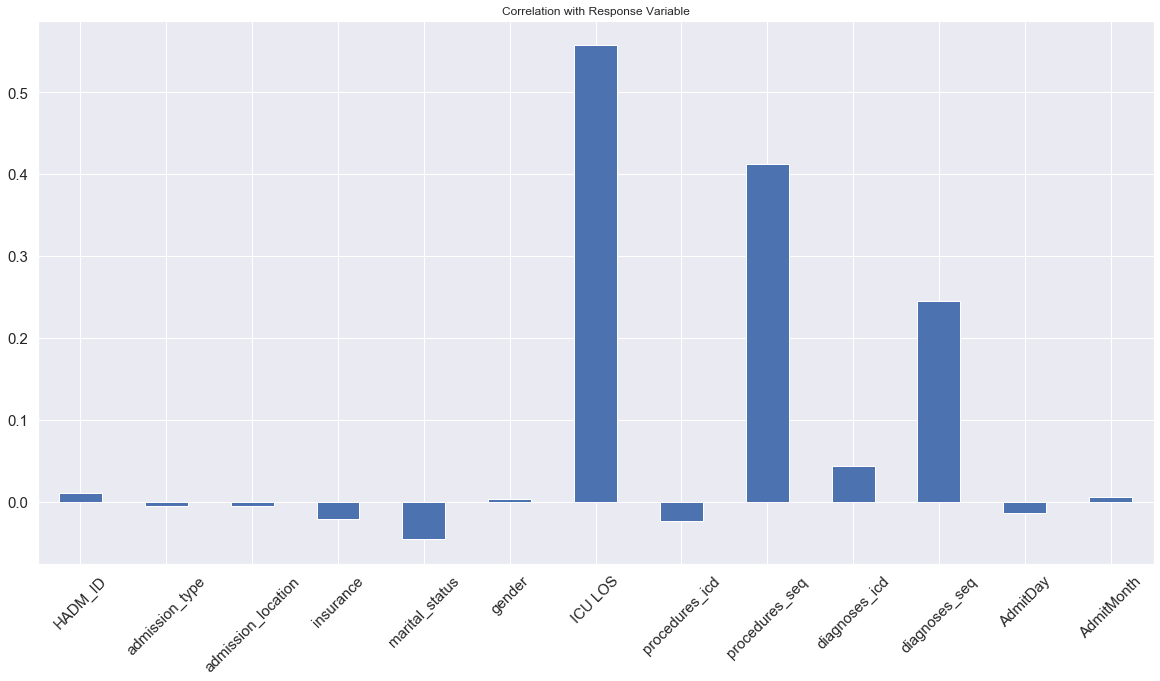

In [34]:
# Corelation with target variable
X.corrwith(y).plot.bar(figsize = (20, 10), title = 'Correlation with Response Variable', 
                                   fontsize = 15, rot = 45, grid = True)

In [35]:
# Set Background
sn.set(style = 'white', font_scale =2)
# Compute the matrix
corr = X.corr()
# Generate the mask for the upper triangle

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

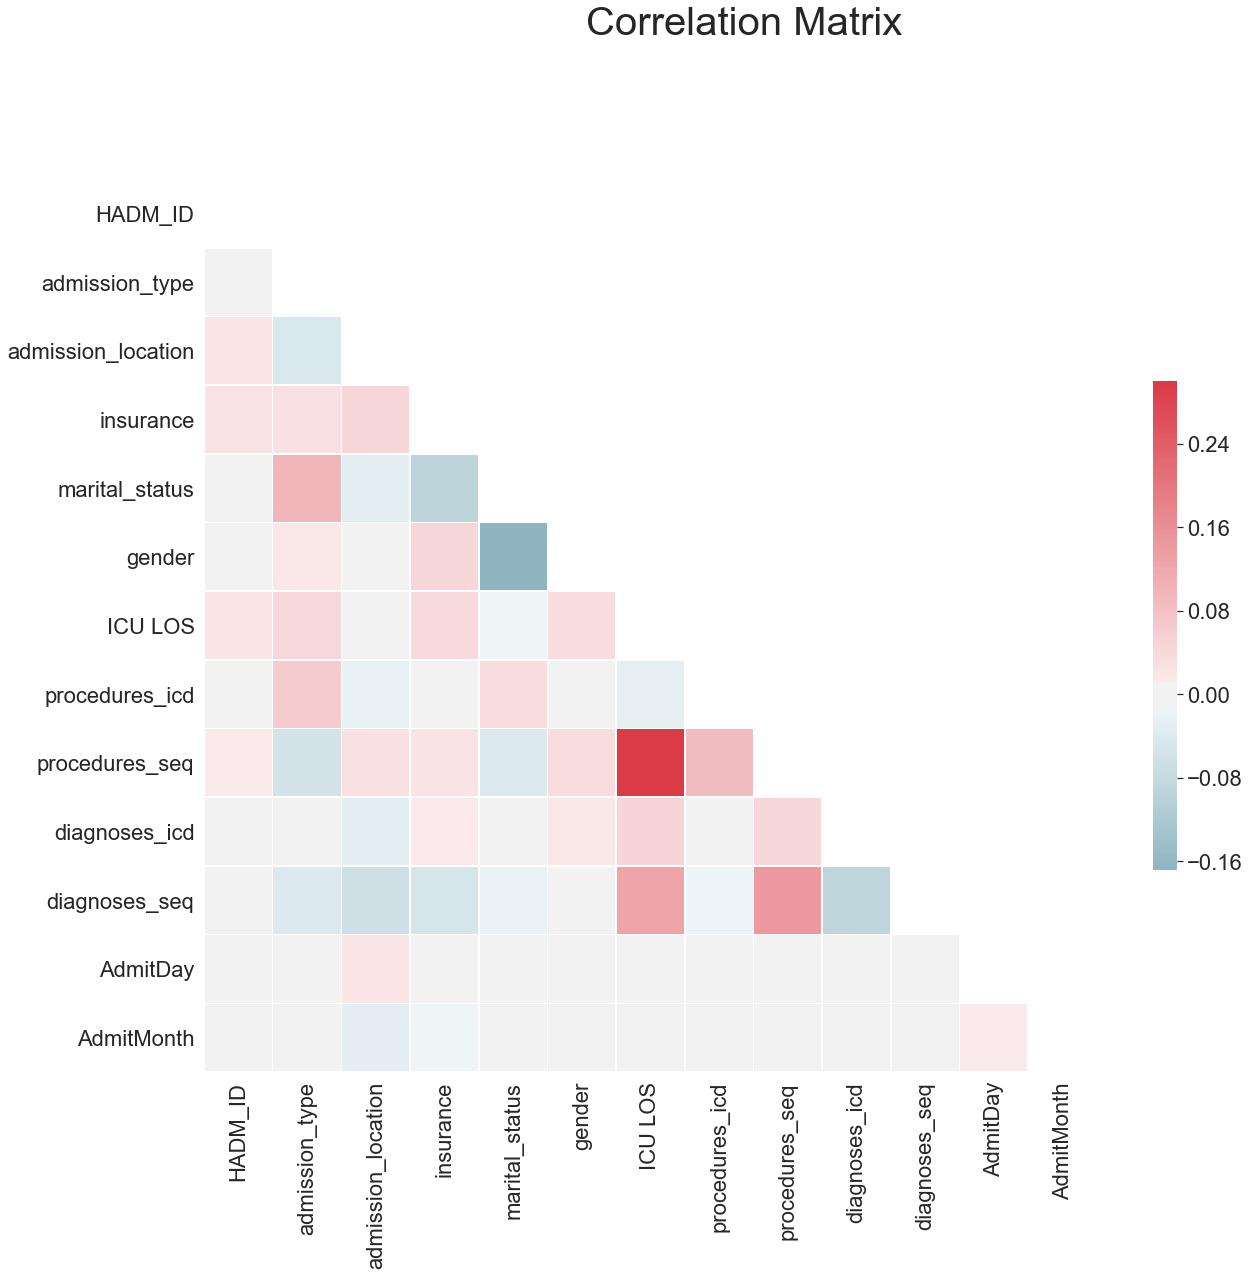

In [36]:
import matplotlib.pyplot as plt
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))
f.suptitle("Correlation Matrix", fontsize = 40)

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask = mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

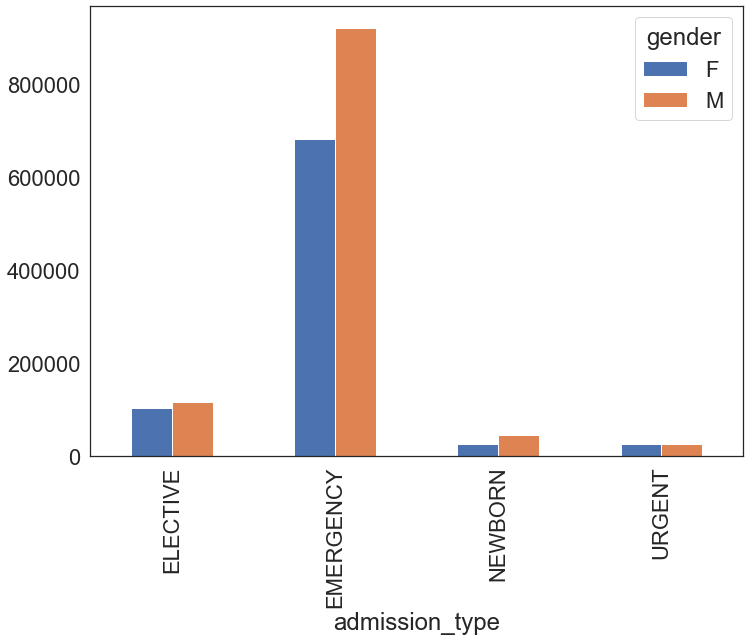

In [37]:
gender_count =  mimic_40.groupby(['admission_type','gender']).gender.count().unstack()
gender_count.plot(kind = 'bar')

In [38]:
#Splliting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 12)

In [39]:
#Now we will create a pipeline to choose the best model. 
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDRegressor, Ridge, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
pipe = Pipeline([('preprocessing', MinMaxScaler()), ('regressor',RandomForestRegressor())])


param_grid = [
{'regressor': [RandomForestRegressor()], 'preprocessing': [MinMaxScaler()],'regressor__max_depth':[24,27]}]

In [40]:
#Now We will crate a Grid Search without Length of stay of ICU. 
X_train_no_ICU = X_train.drop(['ICU LOS'], axis = 1)
X_test_no_ICU = X_test.drop(['ICU LOS'], axis = 1)

In [42]:
from sklearn.model_selection import GridSearchCV
#Creating the grid
grid2 = GridSearchCV(pipe, param_grid, cv=2)
grid2.fit(X_train_no_ICU, y_train)

GridSearchCV(cv=2, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessing',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('regressor',
                                        RandomForestRegressor(bootstrap=True,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              max_samples=None,
                                                              min_impurity_decrease=0.0,
                     

In [43]:
#The best parameters and best accuracy score is.
print(grid2.best_params_, '\n\n', 'Best score',grid2.best_score_, "\n\n The best Test score is", grid2.score(X_test_no_ICU,y_test))

{'preprocessing': MinMaxScaler(copy=True, feature_range=(0, 1)), 'regressor': RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=27, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False), 'regressor__max_depth': 27} 

 Best score 0.8698033930030362 

 The best Test score is 0.9326634145903218


In [44]:
# Now we will create a neural network to predict the los
# TO compile neural network CPU takes lot of time so we will do it on GPU

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

C:\Users\soham\Anaconda3\envs\tn1\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\soham\Anaconda3\envs\tn1\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\soham\Anaconda3\envs\tn1\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\soham\Anaconda3\envs\tn1\lib\site-packages\tensorflow\python\framework

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 884678076929029757
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3146173644
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11559765508270908784
physical_device_desc: "device: 0, name: GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


# Everything below this is about Neural Networks

In [45]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

In [46]:
import tensorflow as tf
import keras
config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 6},  ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

## Importing packages

In [47]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.layers import LeakyReLU

In [48]:
mm = MinMaxScaler()

In [49]:
X_train_no_ICU_scaled = mm.fit_transform(X_train_no_ICU)
X_test_no_ICU_scaled = mm.fit_transform(X_test_no_ICU)

In [50]:
print( X_train_no_ICU.shape[0])

1456781


## Creating the model

In [51]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(32, kernel_initializer='normal',input_dim = X_train_no_ICU.shape[1], activation='relu'))


NN_model.add(Dense(256, kernel_initializer= 'normal', activation= 'relu'))
NN_model.add(Dense(128, kernel_initializer= 'normal', activation= 'relu'))
NN_model.add(Dense(96, kernel_initializer= 'normal', activation= 'relu'))
NN_model.add(Dense(64, kernel_initializer= 'normal', activation= 'relu'))
NN_model.add(Dense(16, kernel_initializer= 'normal', activation= 'relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='Zeros'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                416       
_________________________________________________________________
dense_2 (Dense)              (None, 256)               8448      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 96)                12384     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                6208      
_________________________________________________________________
dense_6 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [52]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

## Training the model 

In [53]:
History =  NN_model.fit(X_train_no_ICU_scaled, y_train, epochs=500, batch_size=3000 , validation_data = (X_test_no_ICU_scaled,y_test), verbose=1)


Train on 1456781 samples, validate on 485594 samples
Epoch 1/500
1456781/1456781 [==============================] - 4s 3us/step - loss: 7.9765 - mean_absolute_error: 7.9765 - val_loss: 6.9539 - val_mean_absolute_error: 6.9539
Epoch 2/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 6.9293 - mean_absolute_error: 6.9293 - val_loss: 6.9088 - val_mean_absolute_error: 6.9088
Epoch 3/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 6.9014 - mean_absolute_error: 6.9014 - val_loss: 6.8971 - val_mean_absolute_error: 6.8971
Epoch 4/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 6.8912 - mean_absolute_error: 6.8912 - val_loss: 6.8936 - val_mean_absolute_error: 6.8936
Epoch 5/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 6.8741 - mean_absolute_error: 6.8741 - val_loss: 6.8587 - val_mean_absolute_error: 6.8587
Epoch 6/500
1456781/1456781 [==============================] - 3s 2us/step - loss

1456781/1456781 [==============================] - 3s 2us/step - loss: 3.4325 - mean_absolute_error: 3.4325 - val_loss: 3.3739 - val_mean_absolute_error: 3.3739
Epoch 94/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 3.3946 - mean_absolute_error: 3.3946 - val_loss: 3.3017 - val_mean_absolute_error: 3.3017
Epoch 95/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 3.3651 - mean_absolute_error: 3.3651 - val_loss: 3.3772 - val_mean_absolute_error: 3.3772
Epoch 96/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 3.3325 - mean_absolute_error: 3.3325 - val_loss: 3.3382 - val_mean_absolute_error: 3.3382
Epoch 97/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 3.3829 - mean_absolute_error: 3.3829 - val_loss: 3.2511 - val_mean_absolute_error: 3.2511
Epoch 98/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 3.3248 - mean_absolute_error: 3.3248 - val_loss: 3.3492 - v

Epoch 140/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 2.8717 - mean_absolute_error: 2.8717 - val_loss: 2.9223 - val_mean_absolute_error: 2.9223
Epoch 141/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 2.7977 - mean_absolute_error: 2.7977 - val_loss: 2.9172 - val_mean_absolute_error: 2.9172
Epoch 142/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 2.8479 - mean_absolute_error: 2.8479 - val_loss: 2.7979 - val_mean_absolute_error: 2.7979
Epoch 143/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 2.8375 - mean_absolute_error: 2.8375 - val_loss: 2.7264 - val_mean_absolute_error: 2.7264
Epoch 144/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 2.8425 - mean_absolute_error: 2.8425 - val_loss: 2.7763 - val_mean_absolute_error: 2.7763
Epoch 145/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 2.8370 - mean_absolute_error: 2.8370 - v

Epoch 187/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 2.5151 - mean_absolute_error: 2.5151 - val_loss: 2.5485 - val_mean_absolute_error: 2.5485
Epoch 188/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 2.5889 - mean_absolute_error: 2.5889 - val_loss: 2.7246 - val_mean_absolute_error: 2.7246
Epoch 189/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 2.5046 - mean_absolute_error: 2.5046 - val_loss: 2.3825 - val_mean_absolute_error: 2.3825
Epoch 190/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 2.5227 - mean_absolute_error: 2.5227 - val_loss: 2.7572 - val_mean_absolute_error: 2.7572
Epoch 191/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 2.5257 - mean_absolute_error: 2.5257 - val_loss: 2.5466 - val_mean_absolute_error: 2.5466
Epoch 192/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 2.5289 - mean_absolute_error: 2.5289 - v

Epoch 234/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 2.3102 - mean_absolute_error: 2.3102 - val_loss: 2.4032 - val_mean_absolute_error: 2.4032
Epoch 235/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 2.4076 - mean_absolute_error: 2.4076 - val_loss: 2.4242 - val_mean_absolute_error: 2.4242
Epoch 236/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 2.3369 - mean_absolute_error: 2.3369 - val_loss: 2.3415 - val_mean_absolute_error: 2.3415
Epoch 237/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 2.3314 - mean_absolute_error: 2.3314 - val_loss: 2.3725 - val_mean_absolute_error: 2.3725
Epoch 238/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 2.3781 - mean_absolute_error: 2.3781 - val_loss: 2.2046 - val_mean_absolute_error: 2.2046
Epoch 239/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 2.2986 - mean_absolute_error: 2.2986 - v

Epoch 281/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 2.1839 - mean_absolute_error: 2.1839 - val_loss: 2.2220 - val_mean_absolute_error: 2.2220
Epoch 282/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 2.1959 - mean_absolute_error: 2.1959 - val_loss: 2.5751 - val_mean_absolute_error: 2.5751
Epoch 283/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 2.2112 - mean_absolute_error: 2.2112 - val_loss: 2.0511 - val_mean_absolute_error: 2.0511
Epoch 284/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 2.2133 - mean_absolute_error: 2.2133 - val_loss: 2.1233 - val_mean_absolute_error: 2.1233
Epoch 285/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 2.1955 - mean_absolute_error: 2.1955 - val_loss: 2.2337 - val_mean_absolute_error: 2.2337
Epoch 286/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 2.1886 - mean_absolute_error: 2.1886 - v

Epoch 328/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 2.1199 - mean_absolute_error: 2.1199 - val_loss: 2.0349 - val_mean_absolute_error: 2.0349
Epoch 329/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 2.1061 - mean_absolute_error: 2.1061 - val_loss: 2.1265 - val_mean_absolute_error: 2.1265
Epoch 330/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 2.0899 - mean_absolute_error: 2.0899 - val_loss: 2.0531 - val_mean_absolute_error: 2.0531
Epoch 331/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 2.1193 - mean_absolute_error: 2.1193 - val_loss: 2.0688 - val_mean_absolute_error: 2.0688
Epoch 332/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 2.0822 - mean_absolute_error: 2.0822 - val_loss: 2.0700 - val_mean_absolute_error: 2.0700
Epoch 333/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 2.1081 - mean_absolute_error: 2.1081 - v

Epoch 375/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 2.0414 - mean_absolute_error: 2.0414 - val_loss: 1.9979 - val_mean_absolute_error: 1.9979
Epoch 376/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 2.0282 - mean_absolute_error: 2.0282 - val_loss: 2.2440 - val_mean_absolute_error: 2.2440
Epoch 377/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 2.0110 - mean_absolute_error: 2.0110 - val_loss: 1.9752 - val_mean_absolute_error: 1.9752
Epoch 378/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 2.0405 - mean_absolute_error: 2.0405 - val_loss: 2.0604 - val_mean_absolute_error: 2.0604
Epoch 379/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 1.9943 - mean_absolute_error: 1.9943 - val_loss: 1.8879 - val_mean_absolute_error: 1.8879
Epoch 380/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 2.0224 - mean_absolute_error: 2.0224 - v

Epoch 422/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 1.9615 - mean_absolute_error: 1.9615 - val_loss: 1.9150 - val_mean_absolute_error: 1.9150
Epoch 423/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 1.9532 - mean_absolute_error: 1.9532 - val_loss: 1.8643 - val_mean_absolute_error: 1.8643
Epoch 424/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 1.9184 - mean_absolute_error: 1.9184 - val_loss: 2.0107 - val_mean_absolute_error: 2.0107
Epoch 425/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 1.9326 - mean_absolute_error: 1.9326 - val_loss: 1.8695 - val_mean_absolute_error: 1.8695
Epoch 426/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 1.9513 - mean_absolute_error: 1.9513 - val_loss: 1.9077 - val_mean_absolute_error: 1.9077
Epoch 427/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 1.9582 - mean_absolute_error: 1.9582 - v

Epoch 469/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 1.9305 - mean_absolute_error: 1.9305 - val_loss: 1.9225 - val_mean_absolute_error: 1.9225
Epoch 470/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 1.8681 - mean_absolute_error: 1.8681 - val_loss: 2.1149 - val_mean_absolute_error: 2.1149
Epoch 471/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 1.8926 - mean_absolute_error: 1.8926 - val_loss: 1.7737 - val_mean_absolute_error: 1.7737
Epoch 472/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 1.9044 - mean_absolute_error: 1.9044 - val_loss: 1.9635 - val_mean_absolute_error: 1.9635
Epoch 473/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 1.8729 - mean_absolute_error: 1.8729 - val_loss: 1.8922 - val_mean_absolute_error: 1.8922
Epoch 474/500
1456781/1456781 [==============================] - 3s 2us/step - loss: 1.8788 - mean_absolute_error: 1.8788 - v

In [54]:
#Predicting the test dataset.
y_pred = NN_model.predict(X_test_no_ICU_scaled)

In [55]:
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score, max_error

In [66]:
print("Accuracy of the model: -",r2_score(y_test, y_pred) * 100)
print("Mean squred error",mean_squared_error(y_test, y_pred)*100)
print("max error", max_error(y_test,y_pred))

Accuracy of the model: - 85.78310296218244
Mean squred error 1375.8922341014422
max error 61.94049072265625


In [57]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

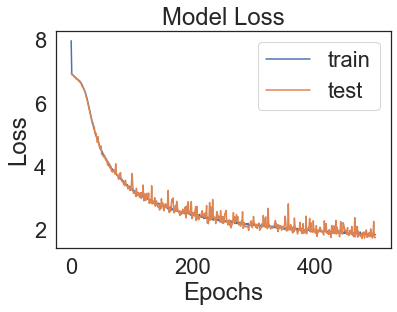

In [58]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

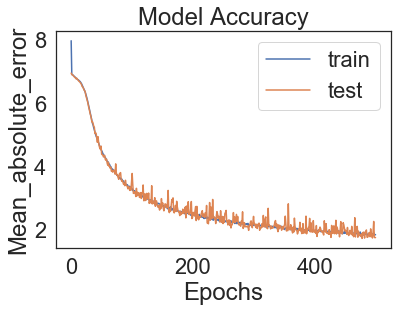

In [59]:
plt.plot(History.history['mean_absolute_error'])
plt.plot(History.history['val_mean_absolute_error'])
plt.title('Model Accuracy')
plt.ylabel('Mean_absolute_error')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [60]:
#Putting data into bins for a classification method on predicting Length of Stay
bins = [-1,4,10,20,40]
group_names = ["Short_Stay", "Average_Stay", "Long_Stay", "Very_Long_Stay"]
y_binned = pd.cut(y, bins, labels = group_names)
y_binned = le.fit_transform(y_binned)
from keras.utils import to_categorical
y_binned = to_categorical(y_binned, 4)

In [61]:
#Splliting the data into train and test
from sklearn.model_selection import train_test_split
X_train_binned, X_test_binned, y_train_binned, y_test_binned = train_test_split(X,y_binned,random_state = 12)

In [62]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier()
rc.fit(X_train_binned, y_train_binned)
rc.score(X_train_binned,y_train_binned)

1.0

In [63]:
NN_model_classification = Sequential()

# The Input Layer :
NN_model_classification.add(Dense(32, kernel_initializer='normal',input_dim = X_train_binned.shape[1], activation='sigmoid'))

#Hidden layer
NN_model_classification.add(Dense(256, kernel_initializer= 'normal', activation= 'sigmoid'))
NN_model_classification.add(Dense(128, kernel_initializer= 'normal', activation= 'sigmoid'))
NN_model_classification.add(Dense(64, kernel_initializer= 'normal', activation= 'sigmoid'))

# The Output Layer :
NN_model_classification.add(Dense(4, kernel_initializer='normal'))

# Compile the network :
NN_model_classification.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
NN_model_classification.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                448       
_________________________________________________________________
dense_9 (Dense)              (None, 256)               8448      
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 260       
Total params: 50,308
Trainable params: 50,308
Non-trainable params: 0
_________________________________________________________________


In [64]:
History =  NN_model_classification.fit(X_train_binned, y_train_binned, epochs=10, batch_size=3000 , validation_data = (X_test_binned,y_test_binned), verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 1456781 samples, validate on 485594 samples
Epoch 1/10
1456781/1456781 [==============================] - 3s 2us/step - loss: 5.7757 - accuracy: 0.3178 - val_loss: 5.7478 - val_accuracy: 0.3187
Epoch 2/10
1456781/1456781 [==============================] - 3s 2us/step - loss: 5.7377 - accuracy: 0.3178 - val_loss: 5.7478 - val_accuracy: 0.3187
Epoch 3/10
1456781/1456781 [==============================] - 3s 2us/step - loss: 5.7377 - accuracy: 0.3178 - val_loss: 5.7478 - val_accuracy: 0.3187
Epoch 4/10
1456781/1456781 [==============================] - 3s 2us/step - loss: 5.7377 - accuracy: 0.3178 - val_loss: 5.7478 - val_accuracy: 0.3187
Epoch 5/10
1456781/1456781 [==============================] - 3s 2us/step - loss: 5.7377 - accuracy: 0.3178 - val_loss: 5.7478 - val_accuracy: 0.3187
Epoch 6/10
1456781/1456781 [==============================] - 3s 2us/step - loss: 5.7377 - accuracy: 0.